<a href="https://colab.research.google.com/github/kaylangu/DS4002-Project3/blob/main/SCRIPTS/SSIManalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SSIM analysis
!pip install scikit-image opencv-python

In [2]:
!git clone https://github.com/kaylangu/DS4002-Project3

Cloning into 'DS4002-Project3'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (463/463), done.
remote: Compressing objects: 100% (433/433), done.
remote: Total 463 (delta 28), reused 295 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (463/463), 36.74 MiB | 6.30 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [6]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import pandas as pd

                         Style      SSIM
0       abstract_expressionism  0.443994
1              action_painting  0.387008
2            analytical_cubism  0.352677
3           art_nouveau_modern  0.382608
4                      baroque  0.352165
5         color_field_painting  0.375673
6         contemporary_realism  0.454990
7                       cubism  0.451940
8            early_renaissance  0.321419
9                expressionism  0.197035
10                     fauvism  0.392387
11            high_renaissance  0.388689
12               impressionism  0.410749
13  mannerism_late_renaissance  0.444087
14                  minimalism  0.396061
15       naive_art_primitivism  0.427542
16                 new_realism  0.327799
17        northern_renaissance  0.374125
18                 pointillism  0.376181
19                     pop_art  0.314394
20          post_impressionism  0.452805
21                     realism  0.432949
22                      rococo  0.425630
23              

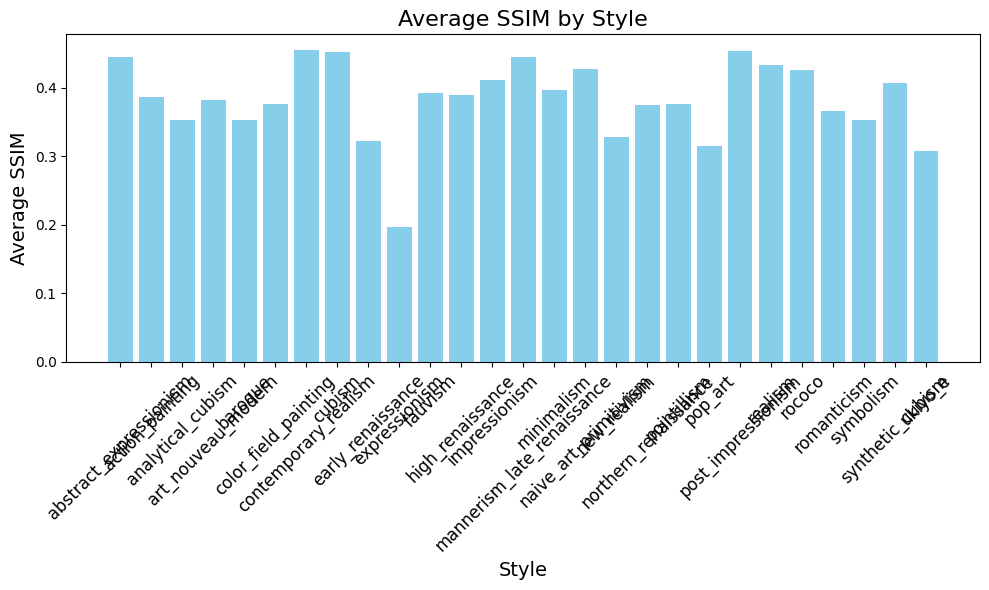

In [7]:
base_folder = './DS4002-Project3/DATA/Images'
output_folder = './DS4002-Project3/OUTPUT'

results = []

base_images = [f for f in os.listdir(base_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for base_image in base_images:
    base_image_path = os.path.join(base_folder, base_image)
    original_image = cv2.imread(base_image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is None:
        print(f"Error: Could not load the base image {base_image}. Skipping.")
        continue

    # remove file type extension
    base_name = os.path.splitext(base_image)[0]

    # in form ./OUTPUT/base_name
    stylized_folder = os.path.join(output_folder, base_name)

    if not os.path.exists(stylized_folder):
        print(f"No stylized folder found for {base_name}. Skipping.")
        continue

    stylized_images = [f for f in os.listdir(stylized_folder) if f.startswith(base_name) and f.endswith(('.jpg', '.jpeg', '.png'))]

    # compares each image
    for stylized_image in stylized_images:
        stylized_image_path = os.path.join(stylized_folder, stylized_image)
        styled_image = cv2.imread(stylized_image_path, cv2.IMREAD_GRAYSCALE)

        if styled_image is None:
            print(f"Error: Could not load the stylized image {stylized_image}. Skipping.")
            continue

        # resize to be the same image dimensions
        if original_image.shape != styled_image.shape:
            styled_image = cv2.resize(styled_image, (original_image.shape[1], original_image.shape[0]))

        # compute SSIM
        ssim_value, _ = ssim(original_image, styled_image, full=True)

        # grab style name from stylized image name
        style_name = stylized_image.replace(base_name, '').strip('_').split('.')[0]

        results.append({
            "Base Image": base_image,
            "Style": style_name,
            "SSIM": ssim_value
        })

df = pd.DataFrame(results)

# compute the average SSIM for each style
average_ssim = df.groupby("Style")["SSIM"].mean().reset_index()
print(average_ssim)

# plot the average SSIMs per style
plt.figure(figsize=(10, 6))
plt.bar(average_ssim["Style"], average_ssim["SSIM"], color='skyblue')
plt.title("Average SSIM by Style", fontsize=16)
plt.xlabel("Style", fontsize=14)
plt.ylabel("Average SSIM", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



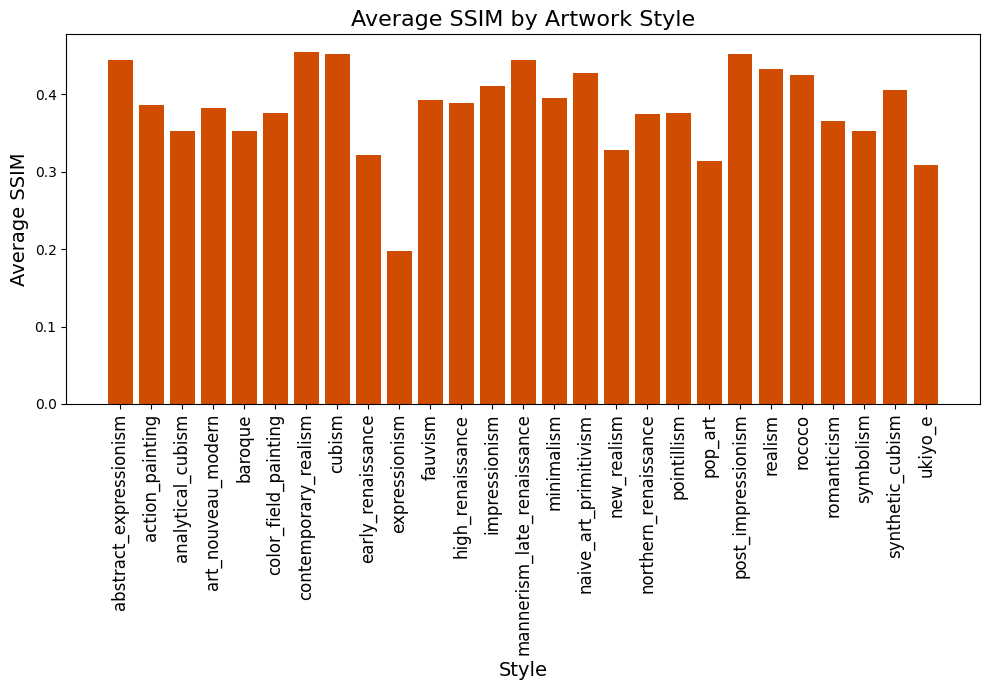

In [14]:
plt.figure(figsize=(10, 7))
plt.bar(average_ssim["Style"], average_ssim["SSIM"], color='#D04C00')
plt.title("Average SSIM by Artwork Style", fontsize=16)
plt.xlabel("Style", fontsize=14)
plt.ylabel("Average SSIM", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


In [15]:
# Find the row with the maximum SSIM
max_ssim_row = average_ssim.loc[average_ssim["SSIM"].idxmax()]
max_style = max_ssim_row["Style"]
max_ssim_value = max_ssim_row["SSIM"]

# Find the row with the minimum SSIM
min_ssim_row = average_ssim.loc[average_ssim["SSIM"].idxmin()]
min_style = min_ssim_row["Style"]
min_ssim_value = min_ssim_row["SSIM"]

# Print results
print(f"Style with the highest average SSIM: {max_style} (SSIM = {max_ssim_value:.4f})")
print(f"Style with the lowest average SSIM: {min_style} (SSIM = {min_ssim_value:.4f})")


Style with the highest average SSIM: contemporary_realism (SSIM = 0.4550)
Style with the lowest average SSIM: expressionism (SSIM = 0.1970)


In [ ]:
# will print out the SSIM map for every image and its style
for filename in base_images:
  ssim_value, ssim_map = ssim(original_image, stylized_image, full=True)
  print(f"SSIM for {filename}: {ssim_value:.4f}")

  # visualize the SSIM map for the current image
  plt.imshow(ssim_map, cmap='gray')
  plt.title(f'SSIM Map for {filename}')
  plt.colorbar()
  plt.show()